In [2]:
import numpy as np 
import pandas as pd 

In [3]:
data = pd.read_csv('wineQualityReds.csv')
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data['quality'] = data['quality'].apply(lambda x: 0 if x < 6 else 1)
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
data['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop(['quality'],axis=1)
y = data['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

model_2 = DecisionTreeClassifier(random_state=42,max_depth=10)
model_2.fit(X_train,y_train)

predict_y_1 = model_1.predict(X_test)
predict_y_2 = model_2.predict(X_test)
print(f1_score(y_test,predict_y_1))
print(f1_score(y_test,predict_y_2))

0.7390476190476191
0.7601476014760148


/home/roman/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomForestRegressor

model_3 = BaggingClassifier(random_state=42,estimator=model_2,n_estimators=1500)
model_3.fit(X_train,y_train)
predict_y_3 = model_3.predict(X_test)

In [9]:
print(f1_score(y_test,predict_y_3))

0.8239700374531835


In [10]:
data = pd.read_csv('boston.csv')
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","5,33","36,2"


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crim_rate       506 non-null    object
 1   zn              506 non-null    object
 2   business        506 non-null    object
 3   river           506 non-null    int64 
 4   nit_oxiden      506 non-null    object
 5   rooms           506 non-null    object
 6   age             506 non-null    object
 7   dist            506 non-null    object
 8   highways_index  506 non-null    int64 
 9   tax             506 non-null    int64 
 10  pup_per_teaс    506 non-null    object
 11  lower           506 non-null    object
 12  target          506 non-null    object
dtypes: int64(3), object(10)
memory usage: 51.5+ KB


In [12]:
lst = ['crim_rate','zn','business','nit_oxiden','rooms','age',
       'dist','pup_per_teaс','lower','target']

for i in lst:
    data[i] = data[i].str.replace(',','.').astype(float)
 

In [13]:
X = data.drop(['target'],axis=1)
y = data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,test_size=0.3)

In [14]:
y_train.mean().round(2)

22.77

In [15]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

predict_y_1 = model_1.predict(X_test)
predict_y_1train = model_1.predict(X_train)
print(metrics.mean_absolute_error(y_train,predict_y_1train).round(2))
print(metrics.mean_absolute_error(y_test,predict_y_1).round(2))

3.32
3.72


In [16]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor(random_state=13)
model_2.fit(X_train,y_train)

predict_y_2 = model_2.predict(X_test)
predict_y_2train = model_2.predict(X_train)

print(metrics.mean_absolute_error(y_train,predict_y_2train).round(2))
print(metrics.mean_absolute_error(y_test,predict_y_2).round(2))


0.0
2.84


In [17]:
from sklearn.ensemble import RandomForestClassifier

for i in [3,10,10,500]:
    model = RandomForestRegressor(n_estimators=i,random_state=13)
    model.fit(X_train,y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    print(f'метрика МАЕ на обучающей выборке с количеством деревьев {i} : {(metrics.mean_absolute_error(y_train,predict_train)).round(2)}')
    print(f'метрика МАЕ на тестовой выборке с количеством деревьев {i} : {(metrics.mean_absolute_error(y_test,predict_test)).round(2)}')
    print('------------------------------------------------------------------')


метрика МАЕ на обучающей выборке с количеством деревьев 3 : 1.02
метрика МАЕ на тестовой выборке с количеством деревьев 3 : 2.93
------------------------------------------------------------------
метрика МАЕ на обучающей выборке с количеством деревьев 10 : 0.98
метрика МАЕ на тестовой выборке с количеством деревьев 10 : 2.47
------------------------------------------------------------------
метрика МАЕ на обучающей выборке с количеством деревьев 10 : 0.98
метрика МАЕ на тестовой выборке с количеством деревьев 10 : 2.47
------------------------------------------------------------------
метрика МАЕ на обучающей выборке с количеством деревьев 500 : 0.85
метрика МАЕ на тестовой выборке с количеством деревьев 500 : 2.24
------------------------------------------------------------------


In [18]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [20]:
data.isna().sum().sum()

343248

In [21]:
data.isna().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

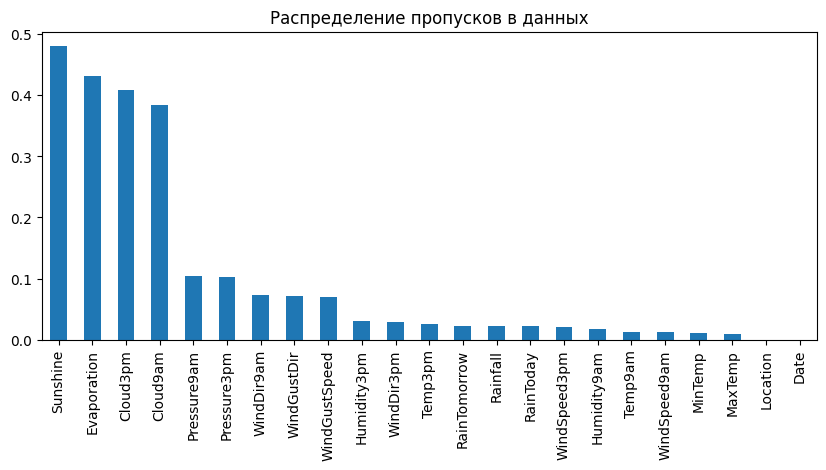

In [22]:
(data.isna().mean().sort_values(ascending=False)).plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных');

In [23]:
df = data.dropna(thresh=data.shape[0]*0.6,axis=1)

In [24]:
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, df[col].nunique(),df[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,RainTomorrow,2,object
1,RainToday,2,object
2,Cloud9am,10,float64
3,WindDir3pm,16,object
4,WindDir9am,16,object
5,WindGustDir,16,object
6,WindSpeed9am,43,float64
7,WindSpeed3pm,44,float64
8,Location,49,object
9,WindGustSpeed,67,float64


In [25]:
def func(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

df['RainToday'] = df['RainToday'].apply(func)
df['RainTomorrow'] = df['RainTomorrow'].apply(func)

/tmp/ipykernel_3892/283440541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].apply(func)
/tmp/ipykernel_3892/283440541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].apply(func)


In [26]:
df['RainToday'].mean().round(2)

0.22

In [27]:
df['Month'] = pd.to_datetime(df['Date'],errors='ignore').dt.month
df = df.drop(['Date'],axis=1)

/tmp/ipykernel_3892/3846735132.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Month'] = pd.to_datetime(df['Date'],errors='ignore').dt.month
/tmp/ipykernel_3892/3846735132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Date'],errors='ignore').dt.month


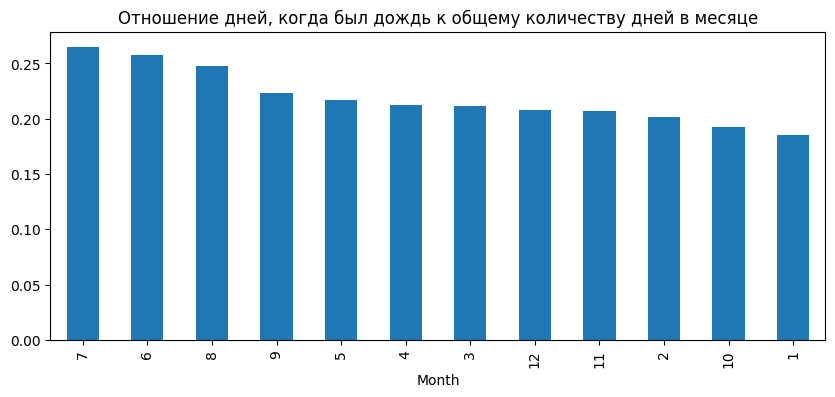

In [28]:
mask = df.groupby('Month').agg({'RainToday':'sum','Month':'count',})

((mask['RainToday']/mask['Month']).sort_values(ascending=False)).plot(
    kind='bar',
    figsize=(10, 4),
    title='Отношение дней, когда был дождь к общему количеству дней в месяце');

In [29]:
df_dummies = pd.get_dummies(df,columns=['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_dummies.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,True,False,False,False,False,False,False,False,False


In [30]:
data_finish = df_dummies.dropna(axis=0)


In [31]:
X = data_finish.drop(['RainTomorrow'],axis=1)
y = data_finish['RainTomorrow']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=31)

In [32]:
X_train = X_train.reset_index().drop(['index'],axis=1)

In [33]:
np.random.seed(31)
lst = []
for i in range(1000):
    samp = np.random.randint(0,X_train.shape[0],X_train.shape[0])
    mean_value = np.mean(X_train.loc[samp,'MinTemp'])
    lst.append(mean_value)



In [34]:
np.std(lst).round(2)

0.03

In [35]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
predict_y_log = model_log.predict(X_test)

print(metrics.roc_auc_score(y_test,predict_y_log).round(2))


0.73


/home/roman/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# from sklearn.model_selection import GridSearchCV
# params = {'max_leaf_nodes': list(range(2, 10)),
#         'min_samples_split': [2, 3, 4],
#         'max_depth': [5,7,9,11]} 


# GS = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
#                   param_grid=params,
#                   cv=3,
#                   n_jobs=-1,
#                   scoring='roc_auc')
# GS.fit(X_train,y_train)


In [37]:
GS.best_params_

NameError: name 'GS' is not defined

In [38]:
predict_y = GS.predict(X_test)
print(metrics.roc_auc_score(y_test,predict_y).round(2))

NameError: name 'GS' is not defined

In [39]:
model_enc = RandomForestClassifier(n_estimators=100,random_state=31)
model_enc.fit(X_train,y_train)

predict_y = model_enc.predict(X_test)
print(metrics.roc_auc_score(y_test,predict_y))

0.7329684570290497


In [39]:
# params = {'max_features': [ 4, 5, 6, 7], 
#         'min_samples_leaf': [3, 5, 7, 9, 11], 
#         'max_depth': [5, 10, 15]}

# GS = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,random_state=31),
#                   param_grid=params,
#                   n_jobs=-1,
#                   scoring='roc_auc')

# GS.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=31), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [3, 5, 7, 9, 11]},
             scoring='roc_auc')

In [40]:
y_pred = GS.predict(X_test)
print(metrics.roc_auc_score(y_test,y_pred))

NameError: name 'GS' is not defined

In [41]:
pd.DataFrame({'features':X_train.columns, 'weight': model_enc.feature_importances_}).sort_values(by='weight',ascending=False)

,features,weight
7,Humidity3pm,0.155455
9,Pressure3pm,0.063092
2,Rainfall,0.056589
8,Pressure9am,0.056401
6,Humidity9am,0.054626
...,...,...
50,Location_Newcastle,0.000000
49,Location_MountGinini,0.000000
56,Location_Penrith,0.000000
40,Location_GoldCoast,0.000000


In [41]:
import matplotlib.pyplot as plt
import xgboost

In [42]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

NameError: name 'y_pred' is not defined

In [44]:
airdata = pd.read_csv('AirPass.csv')
print(data.shape)
airdata.head()


(145460, 23)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
airdata.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [46]:
airdata['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [47]:
airdata['Arrival Delay in Minutes'] = airdata['Arrival Delay in Minutes'].fillna(airdata['Arrival Delay in Minutes'].median())
airdata['Arrival Delay in Minutes'].mean()

15.133392362180475

In [48]:
airdata['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [49]:
mask_1 = airdata.groupby(['Gender','satisfaction'])['Gender'].count()
mask_1

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: Gender, dtype: int64

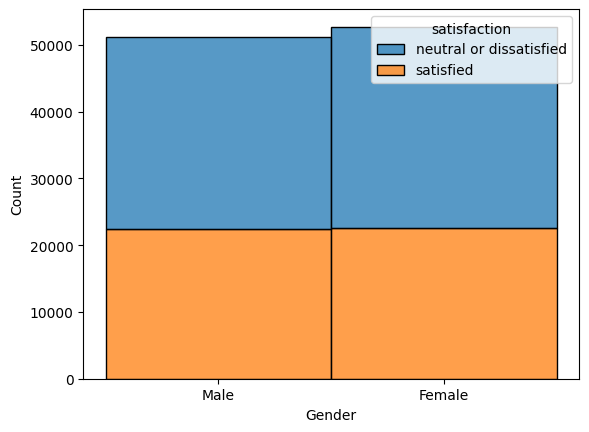

In [50]:
import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(airdata,x='Gender',hue='satisfaction',multiple="stack");



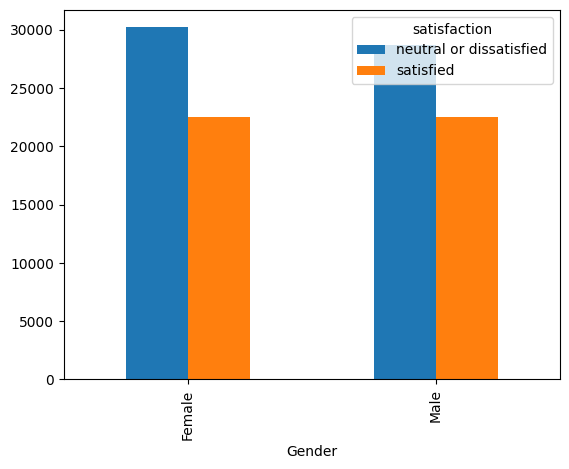

In [51]:
airdata.pivot_table(index='Gender',columns='satisfaction',values='id',aggfunc='count').plot.bar();

In [52]:
airdata['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

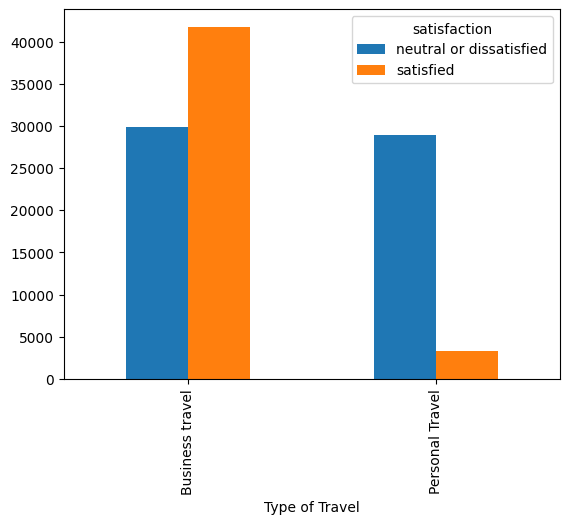

In [53]:
airdata.pivot_table(index='Type of Travel',columns='satisfaction',values='id',aggfunc='count').plot(kind='bar');

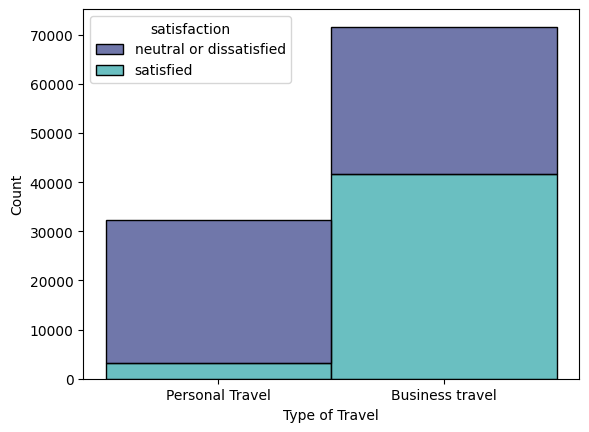

In [54]:
sns.histplot(airdata,x='Type of Travel',hue='satisfaction',palette="mako",multiple='stack');

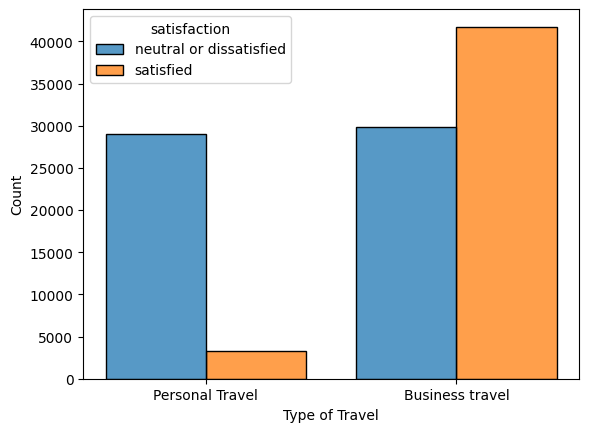

In [55]:
sns.histplot(data=airdata, x="Type of Travel", hue="satisfaction", multiple="dodge",shrink=.8);

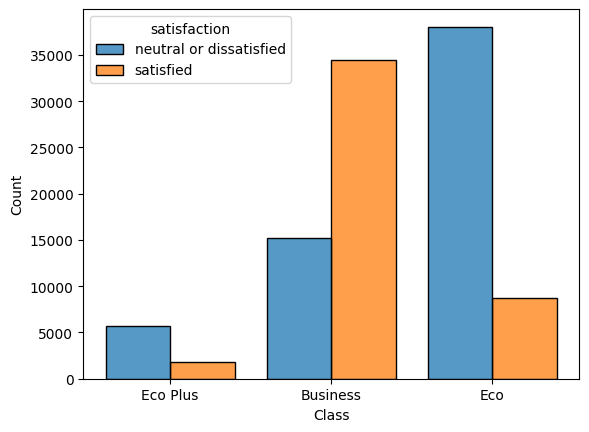

In [56]:
sns.histplot(airdata,x='Class',hue='satisfaction',multiple='dodge',shrink=0.8);

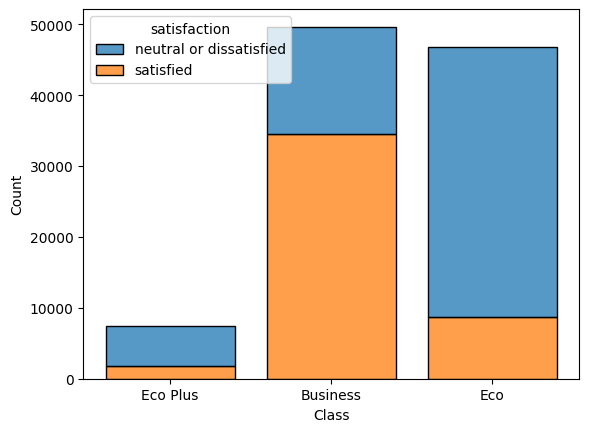

In [57]:
sns.histplot(airdata,x='Class',hue='satisfaction',multiple='stack',shrink=0.8);

In [58]:
airdata['satisfaction'] = airdata['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
airdata['Customer Type'] = airdata['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
airdata['Type of Travel'] = airdata['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
airdata['Gender'] = airdata['Gender'].map({'Male': 0, 'Female': 1})

In [59]:
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in airdata.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, airdata[col].nunique(),airdata[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
print(unique_counts)

                          Column_Name  Num_Unique     Type
0                        satisfaction           2    int64
1                              Gender           2    int64
2                       Customer Type           2    int64
3                      Type of Travel           2    int64
4                               Class           3   object
5                    Baggage handling           5    int64
6                         Cleanliness           6    int64
7                    Inflight service           6    int64
8                     Checkin service           6    int64
9                    Leg room service           6    int64
10                   On-board service           6    int64
11             Inflight entertainment           6    int64
12                       Seat comfort           6    int64
13                     Food and drink           6    int64
14                      Gate location           6    int64
15             Ease of Online booking           6    int

In [60]:
df_dummies = pd.get_dummies(airdata,columns=['Class'])

In [61]:
df_dummies.drop(['Unnamed: 0'],axis=1,inplace=True)

In [62]:
X = df_dummies.drop(['satisfaction'],axis=1)
y = df_dummies['satisfaction']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=26)
y_test.shape[0]

20781

In [67]:
from sklearn.preprocessing import StandardScaler

model_scaler = StandardScaler()
model_scaler.fit(X_train)
X_train_scaler = model_scaler.transform(X_train)
X_test_scaler = model_scaler.transform(X_test)
cols = X_train.columns

X_train_scaler = pd.DataFrame(X_train_scaler,columns=cols)
X_test_scaler = model_scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler,columns=cols)

In [68]:
X_test_scaler.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0.940825,-1.018224,0.473818,0.372904,0.670165,2.697488,-0.547530,-0.695536,0.174911,-0.764168,...,0.494379,0.314854,1.342211,0.306837,-0.214718,-0.385943,-0.364348,1.046242,-0.905230,-0.278973
1,-0.866873,0.982103,0.473818,1.499301,0.670165,0.453800,-2.053363,0.615389,-1.968128,1.583091,...,1.254581,1.160957,-0.238159,1.157039,0.546879,-0.385943,-0.338591,1.046242,-0.905230,-0.278973
2,-1.633039,0.982103,-2.110513,-1.151046,0.670165,-0.760821,-1.300446,0.615389,-1.253782,0.800671,...,-1.786228,0.314854,-1.818530,-0.543365,-0.214718,-0.385943,-0.390106,-0.955802,1.104692,-0.278973
3,0.191849,-1.018224,0.473818,-0.952270,0.670165,1.300323,-0.547530,-0.695536,-0.539436,-0.764168,...,-1.026026,1.160957,-0.238159,1.157039,1.308477,-0.307881,-0.390106,1.046242,-0.905230,-0.278973
4,-0.795763,-1.018224,0.473818,0.107869,0.670165,2.311337,-1.300446,-1.350999,-1.253782,-1.546588,...,0.494379,1.160957,1.342211,0.306837,1.308477,12.650417,12.488494,1.046242,-0.905230,-0.278973


In [71]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train_scaler,y_train)

pred_y_train_logreg = model_logistic_regression.predict(X_train_scaler)
pred_y_test_logreg = model_logistic_regression.predict(X_test_scaler)

print(metrics.f1_score(y_train,pred_y_train_logreg).round(3))
print(metrics.f1_score(y_test,pred_y_test_logreg).round(3))

0.854
0.855


In [81]:
from sklearn.ensemble import AdaBoostClassifier
model = DecisionTreeClassifier(random_state=26)
model_Adaboost = AdaBoostClassifier(estimator=model,random_state=26,learning_rate=0.01)
model_Adaboost.fit(X_train_scaler,y_train)

pred_y_train_Adaboost = model_Adaboost.predict(X_train_scaler)
pred_y_test_Adaboost = model_Adaboost.predict(X_test_scaler)

print(metrics.f1_score(y_train,pred_y_train_Adaboost).round(3))
print(metrics.f1_score(y_test,pred_y_test_Adaboost).round(3))

/home/roman/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.0
0.94


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
model_GB = GradientBoostingClassifier()

params = {'n_estimators':2**np.arange(8),
          'learning_rate':0.1**np.arange(3)}

GS_model = GridSearchCV(estimator=model_GB,
                        param_grid=params,
                        cv=3,
                        n_jobs=-1,
                        scoring='f1')

GS_model.fit(X_train_scaler,y_train)



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([1.  , 0.1 , 0.01]),
                         'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128])},
             scoring='f1')

In [85]:
GS_model.best_score_

0.94911096494409

In [88]:
from xgboost import XGBClassifier,XGBRegressor
model_xgb = XGBClassifier(random_state=26)
model_xgb.fit(X_train_scaler,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=26, ...)

In [89]:
pred_xgb_train = model_xgb.predict(X_train_scaler)
pred_xgb_test = model_xgb.predict(X_test_scaler)

print(metrics.f1_score(y_train,pred_xgb_train).round(3))
print(metrics.f1_score(y_test,pred_xgb_test).round(3))

0.976
0.957


In [90]:
from catboost import CatBoostClassifier,CatBoostRegressor
model_catboost = CatBoostClassifier(random_state=26)
model_catboost.fit(X_train_scaler,y_train)

pred_y_catboost_train = model_catboost.predict(X_train_scaler)
pred_y_catboost_test = model_catboost.predict(X_test_scaler)

print(metrics.f1_score(y_train,pred_y_catboost_train).round(3))
print(metrics.f1_score(y_test,pred_y_catboost_test).round(3))

Learning rate set to 0.068023
0:	learn: 0.6018254	total: 72ms	remaining: 1m 11s
1:	learn: 0.5020788	total: 91.9ms	remaining: 45.9s
2:	learn: 0.4472506	total: 112ms	remaining: 37.1s
3:	learn: 0.4028683	total: 134ms	remaining: 33.4s
4:	learn: 0.3674742	total: 156ms	remaining: 31.1s
5:	learn: 0.3397838	total: 179ms	remaining: 29.6s
6:	learn: 0.3121236	total: 201ms	remaining: 28.5s
7:	learn: 0.2917493	total: 223ms	remaining: 27.7s
8:	learn: 0.2749031	total: 254ms	remaining: 28s
9:	learn: 0.2575194	total: 273ms	remaining: 27.1s
10:	learn: 0.2473688	total: 291ms	remaining: 26.2s
11:	learn: 0.2377536	total: 305ms	remaining: 25.1s
12:	learn: 0.2279307	total: 319ms	remaining: 24.2s
13:	learn: 0.2212511	total: 336ms	remaining: 23.7s
14:	learn: 0.2100355	total: 353ms	remaining: 23.2s
15:	learn: 0.2025734	total: 367ms	remaining: 22.6s
16:	learn: 0.1942301	total: 382ms	remaining: 22.1s
17:	learn: 0.1877938	total: 396ms	remaining: 21.6s
18:	learn: 0.1832382	total: 411ms	remaining: 21.2s
19:	learn: 0

In [91]:
print(metrics.f1_score(y_train,pred_y_catboost_train).round(3))
print(metrics.f1_score(y_test,pred_y_catboost_test).round(3))

0.975
0.96


In [98]:
from catboost import Pool
from catboost.utils import get_confusion_matrix
mat = get_confusion_matrix(model_catboost, Pool(X_train_scaler,y_train))

In [104]:
np.round(mat*100/83123)


array([[56.,  1.],
       [ 2., 42.]])

In [110]:
pd.DataFrame({'features':X_train.columns,'important':model_catboost.feature_importances_}).sort_values(by='important',ascending=False)

,features,important
6,Inflight wifi service,25.260967
4,Type of Travel,18.532444
2,Customer Type,7.373753
11,Online boarding,7.331027
22,Class_Business,5.520561
17,Checkin service,3.864023
3,Age,3.791612
16,Baggage handling,3.586852
9,Gate location,3.283956
12,Seat comfort,2.971680


In [126]:
data = pd.read_csv('Frogs_MFCCs.csv')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [127]:
X = data.drop(['Family','Genus','Species','RecordID'],axis=1)
y = data['Family']

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=31)


In [129]:
y_train = y_train.apply(lambda x: 1 if x=='Dendrobatidae' else 0)
y_test = y_test.apply(lambda x: 1 if x=='Dendrobatidae' else 0)

In [130]:
y_train.value_counts()

Family
0    5308
1     448
Name: count, dtype: int64

In [131]:
model = RandomForestClassifier(random_state=42,n_estimators=10)
model.fit(X_train,y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print(metrics.f1_score(y_train,predict_train).round(2))
print(metrics.f1_score(y_test,predict_test).round(2))

1.0
0.97


In [137]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
model = StackingClassifier(estimators=[('Random',RandomForestClassifier(n_estimators=10,random_state=42)),
                                        ('KKN',neighbors.KNeighborsClassifier(n_neighbors=11)),
                                        ('NB',GaussianNB())],
                            final_estimator=LogisticRegression())

model.fit(X_train,y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print(metrics.f1_score(y_train,predict_train).round(2))
print(metrics.f1_score(y_test,predict_test).round(2))

1.0
0.99
